# 2021 Russian Grand Prix

Again an amazing weekend. Saturday was already great with the track drying up just in time for Q3, giving Lando Norris his maiden pole position. And then there was Sunday. The race was really tense with Norris leading the race and Hamilton getting closer and closer. And then… rain.


So much happened during the last few laps, and I really cannot begin to imagine all the dilemmas the teams and drivers were facing. With only five laps to go, what do you do?! Do you do you choose for inters, or do you take the gamble and stick with the slicks? In other words…


## To box, or not to box?

Let’s see which tyre performed better at which part of the lap during the closing stages of the 2021 Russian Grand Prix.

## Step 1 : Set up the basics

In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

# Enable the cache
ff1.Cache.enable_cache('/home/ilazza/Documenti/Formula1_Data_Analysis/cache') 

# Setup plotting
plotting.setup_mpl()

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

## Step 2 : Collect the data

Then we load the session data (2021, Russian GP, Race), and we tell the Fastf1 Python library to start collecting all data. Since we will use telemetry data, we set with_telemetry to True .

In [2]:
# Load the data of the race session

race = ff1.get_session(2021, 'Russia', 'R')

# Get all the laps

laps = race.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Russian Grand Prix - Race [v2.1.12]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['3', '5', '33', '55', '9', '99', '31', '22', '4', '10', '18', '11', '16', '77', '63', '44', '14', '47', '7', '6']


## Expanding the data

Now that all the data has been loaded by the Fastf1 package, we will have to make a few modifications to the data and apply a few transformations to get the data in the format we’re looking for.


First of all, we create a variable RaceLapNumber, and we select all laps starting from the moment the rain started falling in lap 45 onwards.

In [3]:
# Calculate RaceLapNumber (LapNumber minus 1 since the warmup lap is included in LapNumber)
laps['RaceLapNumber'] = laps['LapNumber'] - 1

# Starting from lap 45 it started raining
laps = laps.loc[laps['RaceLapNumber'] >= 45]


Now, things are getting a bit more complicated. 

To create a comparison per lap, we need lap-by-lap telemetry. Fastf1 only allows us to retrieve telemetry per driver, so we need to do multiple loops to get the data in the format we want.

In [4]:
# Get all drivers
drivers = pd.unique(laps['Driver'])

telemetry = pd.DataFrame()


# Telemetry can only be retrieved driver-by-driver

for driver in drivers:
    driver_laps = laps.pick_driver(driver)

# Since we want to compare distances, we need to collect telemetry lap-by-lap to reset the distance
    for lap in driver_laps.iterlaps():
        driver_telemetry = lap[1].get_telemetry().add_distance()
        driver_telemetry['Driver'] = driver
        driver_telemetry['Lap'] = lap[1]['RaceLapNumber']
        driver_telemetry['Compound'] = lap[1]['Compound']
        
        telemetry = telemetry.append(driver_telemetry)

As you can see, we first loop through all the drivers (line 9), and then select the laps that belong to that driver (line 10). 

To be able to get lap-by-lap comparison of the telemetry, we then loop through all the laps of that driver using the built-in iterlaps() functionality by Fastf1 (line 13), which is basically similar to Pandas’ iterrows().

Then we have single lap for a single driver stored in the variable lap, meaning that we can now load the telemetry and the lap distance (line 14).

And finally, we include some context (driver, lap number, compound) that does not automatically come with the telemetry data (line 14–17).


In [5]:
display(telemetry)

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Lap,Compound
2,2021-09-26 13:19:25.555,0 days 02:18:23.662000,,NaN,0 days 00:00:00,11495,183,4,99,0,...,interpolation,0.000120,OnTrack,1304,-424,256,0.000000,NOR,45,HARD
3,2021-09-26 13:19:25.594,0 days 02:18:23.701000,,NaN,0 days 00:00:00.039000,11568,185,4,99,0,...,pos,0.000480,OnTrack,1273,-428,228,2.004167,NOR,45,HARD
4,2021-09-26 13:19:25.595,0 days 02:18:23.702000,,NaN,0 days 00:00:00.040000,11714,190,4,100,0,...,car,0.000489,OnTrack,1272,-428,227,2.056944,NOR,45,HARD
5,2021-09-26 13:19:25.814,0 days 02:18:23.921000,,NaN,0 days 00:00:00.259000,11581,193,4,100,0,...,pos,0.002546,OnTrack,1206,-525,228,13.797778,NOR,45,HARD
6,2021-09-26 13:19:25.835,0 days 02:18:23.942000,,NaN,0 days 00:00:00.280000,11449,196,4,100,0,...,car,0.002747,OnTrack,1199,-534,228,14.941111,NOR,45,HARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2021-09-26 13:35:17.958,0 days 02:34:16.065000,,2498.530556,0 days 00:01:51.969000,10355,139,3,58,0,...,car,0.996633,OnTrack,1353,-316,229,5796.491667,VER,52,INTERMEDIATE
980,2021-09-26 13:35:17.993,0 days 02:34:16.100000,,2498.530556,0 days 00:01:52.004000,10455,141,3,58,0,...,pos,0.996871,OnTrack,1347,-325,229,5797.862500,VER,52,INTERMEDIATE
981,2021-09-26 13:35:18.194,0 days 02:34:16.301000,,2498.530556,0 days 00:01:52.205000,10555,143,3,58,0,...,pos,0.998266,OnTrack,1319,-361,228,5805.846667,VER,52,INTERMEDIATE
982,2021-09-26 13:35:18.198,0 days 02:34:16.305000,,2498.530556,0 days 00:01:52.209000,10656,145,3,58,0,...,car,0.998294,OnTrack,1318,-361,227,5806.007778,VER,52,INTERMEDIATE


Now we have all the telemetry data, we make two small modifications to it: we only select the columns we need, and we convert all “Hard”, “Medium” and “Soft” compounds to “SLICK”.

In [6]:
# Only keep required columns
telemetry = telemetry[['Lap', 'Distance', 'Compound', 'Speed', 'X','Y']]

# Everything that's not intermediate will be "slick"
telemetry['Compound'].loc[telemetry['Compound'] != 'INTERMEDIATE'] = 'SLICK'


In [13]:
display(telemetry)

,Lap,Distance,Compound,Speed,X,Y,Minisector
2,45,0.000000,SLICK,183,1304,-424,1
3,45,2.004167,SLICK,185,1273,-428,1
4,45,2.056944,SLICK,190,1272,-428,1
5,45,13.797778,SLICK,193,1206,-525,1
6,45,14.941111,SLICK,196,1199,-534,1
...,...,...,...,...,...,...,...
979,52,5796.491667,INTERMEDIATE,139,1353,-316,25
980,52,5797.862500,INTERMEDIATE,141,1347,-325,25
981,52,5805.846667,INTERMEDIATE,143,1319,-361,25
982,52,5806.007778,INTERMEDIATE,145,1318,-361,25


## Create the mini-sector and calculate fastest compounds

So, the data is in the right format now for us to start looking at which tyre was the fastest at which point during the lap. The methodology to do so will be as follows:

1) We split the lap into 25 equally-sized mini-sectors (lap distance / 25)


2) We assign every row in the telemetry data with the correspondent mini-sector that is in (based on the lap distance)


3) We group by lap, mini-sector and compound and calculate the average speed to see which tyre was faster at what point during the lap.

**Step 1** - creating mini-sectors

In [8]:
# Want 25 mini-sectors
num_minisectors = 25

# What is the total distance of a lap?
total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors
minisector_lenght = total_distance/num_minisectors

minisectors = [0]

for i in range(0 , (num_minisectors - 1)):
    minisectors.append(minisector_lenght * (i+1))



**Step 2** - assign the current mini-sector to every row in the telemetry data

In [9]:
# Assign the current mini-sector to every row in the telemetry data
telemetry['Minisector'] = telemetry['Distance'].apply( 
    lambda z: ( minisectors.index ( 
                                    min( minisectors , key = lambda x : abs(x-z))
                                  ) +1
              )
                                   )

As you can see, this is quite complex. What happens here is that we create a column Minisector in the telemetry DataFrame, which runs a calculation based on what is stored in the column Distance . 

Based on the distance, we can see to **what index in the minisector list the distance actually belongs**. The index number is the mini-sector number. Since it is really hard to explain what is going on, I suggest that you play around with the data to see what this piece of code is actually doing.

In [10]:
display(telemetry.head(21))

,Lap,Distance,Compound,Speed,X,Y,Minisector
2,45,0.000000,SLICK,183,1304,-424,1
3,45,2.004167,SLICK,185,1273,-428,1
4,45,2.056944,SLICK,190,1272,-428,1
5,45,13.797778,SLICK,193,1206,-525,1
6,45,14.941111,SLICK,196,1199,-534,1
7,45,25.996667,SLICK,200,1138,-626,1
8,45,28.320000,SLICK,204,1125,-645,1
9,45,38.662222,SLICK,208,1068,-732,1
10,45,42.271389,SLICK,213,1048,-762,1
11,45,51.811389,SLICK,216,996,-842,1


Now that we know which telemetry datapoint was recorded in which mini-sector, we can now calculate the average speed per mini-sector.

**Step 3** - We group by lap, mini-sector and compound, and then calculate the average speed

In [11]:
# Calculate fastest tyre per mini-sector
average_speed = telemetry.groupby(['Lap' , 'Minisector' , 'Compound'])['Speed'].mean().reset_index()

This code will result in the following DataFrame, showing the average speed for every lap, mini-sector and compound combined.

In [12]:
display(average_speed)

,Lap,Minisector,Compound,Speed
0,45,1,SLICK,211.026163
1,45,2,SLICK,265.163498
2,45,3,SLICK,291.645094
3,45,4,SLICK,301.053996
4,45,5,SLICK,300.683983
...,...,...,...,...
320,52,21,INTERMEDIATE,127.796267
321,52,22,INTERMEDIATE,141.092657
322,52,23,INTERMEDIATE,108.219251
323,52,24,INTERMEDIATE,209.708333


Using this data, we select the fastest compound per mini-sector per lap. The idxmax() method gives us the ID of the row with the highest speed per lap per mini-sector.

In [15]:
# Select the compound with the highest average speed
fastest_compounds = average_speed.loc[average_speed.groupby(['Lap' , 'Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the Compound column
fastest_compounds = fastest_compounds[['Lap' , 'Minisector' , 'Compound']].rename(columns={'Compound':'Fastest Compound'})

To finish this bit of code, have to add three more things: merge the telemetry data with the fastest compound per sector, order the telemetry data by distance to avoid the plot from getting messed up, and assign an integer value to the tyre compound since Matplotlib can only handle integer values in this case

In [16]:
# Join the fastest compound per minisector with the full telemetry
telemetry = telemetry.merge(fastest_compounds, on=['Lap' , 'Minisector'])

# Order the data by distance to make Matplotlib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

#Assign an integer value to the compounds for Matplotlib
telemetry.loc[telemetry['Fastest Compound'] == "INTERMEDIATE" , 'Fastest Compound Int'] = 1
telemetry.loc[telemetry['Fastest Compound'] == "SLICK" , 'Fastest Compound Int'] = 2

And now we’re really done with collecting and transforming all the data. 
Quite complex, right? That’s why I keep stressing again and again that you should play around with the data. This is the only way you will really understand what is going on.

## Plotting the data

Now we can finally start plotting the data.

Since we want to generate separate plots per lap, we will put the code into a method to avoid having to repeat ourselves.

In [22]:
def generate_minisector_plot(lap, save=False, details=True):
    single_lap = telemetry.loc[telemetry['Lap'] == lap]

    x = np.array(single_lap['X'].values)
    y = np.array(single_lap['Y'].values)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    compound = single_lap['Fastest Compound Int'].to_numpy().astype(float)

    cmap = cm.get_cmap('ocean', 2)
    lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
    lc_comp.set_array(compound)
    lc_comp.set_linewidth(2)

    plt.rcParams['figure.figsize'] = [15, 10]
    
    if details:
        title = plt.suptitle(
            f"2021 Russian GP \n Lap {lap} - Slicks vs. Inters"
        )
        
    plt.gca().add_collection(lc_comp)
    plt.axis('equal')
    plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
    
    if details:
        cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4))
        cbar.set_ticks(np.arange(1.5, 9.5))
        cbar.set_ticklabels(['Inters', 'Slicks'])
    
    #if save:
     #   plt.savefig('/home/ilazza/Documenti/Formula1_Data_Analysis/img/minisectors_lap_{lap}.png", dpi=300)

    plt.show()

As you might have noticed, this is not your everyday plot where you simply provide to variables and you get a nice lines or bars.
No, this is a plot that draws a line in the shape of the circuit. Let me show explain what’s happening step-by-step:


[Line 2] Since we’re creating a plot for one lap, we get the telemetry of that specific lap


[Line 4–5] The telemetry DataFrame contains an X and Y value for every row, which tells us where 
exactly on the track the car was at that specific moment in time. We want to collect all those X and Y values to draw the circuit in the plot.


[Line 7–9] We combine the X and the Y coordinates together so that they become points, which will then all form segments over the course of the lap. Lastly, we convert the compound variable to a numpy variable.


[Line 11–14] cmap means ColorMap, which basically just defines the colors of our plot. I selected the color scheme ‘ocean’, which I found really suitable for this plot since it ranges from white (Hard tires) to green (Intermediate tires). After that, we create a LineCollection, which basically combines all the previously created segments into a line. This forms the shape of the circuit!


[Line 16] Define the size of the plot, making it a bit bigger.


[Line 18–21] Define the title of the plot (which can be disabled since I used this plot for social posts where I wanted to hide the title).


[Line 23–25] Add the LineCollection (in other words: the shape of the circuit) to the plot and disable all labels.


[Line 27–30] Add a legend to the plot, which is a colorbar that tells us which color belongs to which compound


[Line 32–33] Save the plot


Now we can call the method to generate a plot of the lap for us.

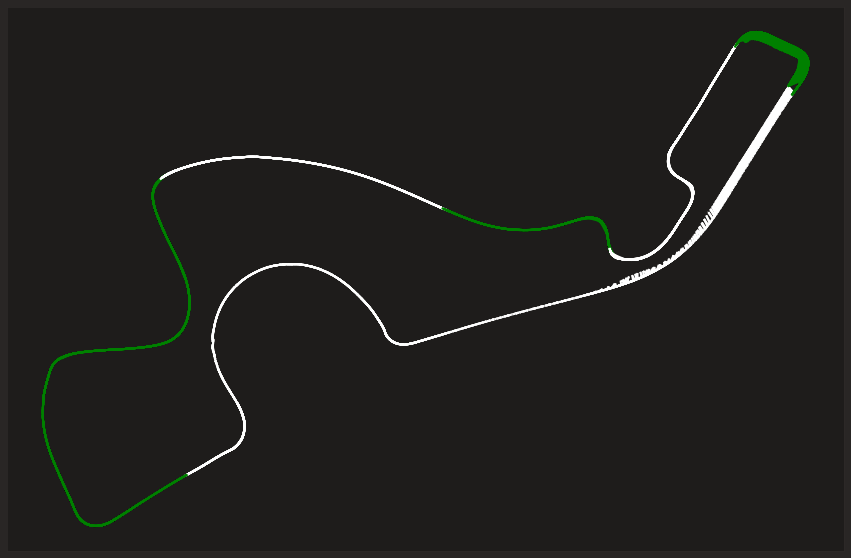

In [23]:
generate_minisector_plot(46, save=True, details=False)

Could be done for every lap and editing the different plots into a single GIF using canva.com.

see ---> https://twitter.com/i/status/1443939714638168065

## Conclusions

So… “To box, or not to box?” remains a very difficult question. The intermediate tyre immediately appeared to be much faster, except for some parts of the track. However, the main question all the teams were struggling with was: what is faster? Doing 3–4 slow laps on the slick tyre, or losing > 20 seconds while boxing, but then having the fastest tyre? In the end, boxing appeared to be the fastest solution (cries in McLaren……..).